In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

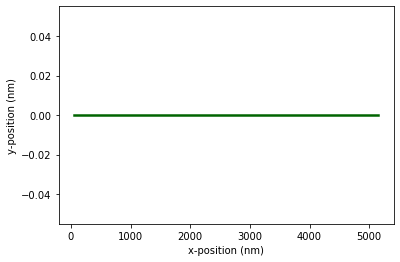

In [3]:
#loading in initial file
_fname = './initfiles/inputFile_047.txt'
_fid = open(_fname)
_data = np.fromfile(_fid,dtype = 'float')
N_points = len(_data)/6
_fid.close()
x_init = _data[0::6]
y_init = _data[1::6]

#plot initial file
plt.plot(x_init,y_init,lw=2.5,color='darkgreen')
plt.xlabel('x-position (nm)')
plt.ylabel('y-position (nm)')
plt.show()

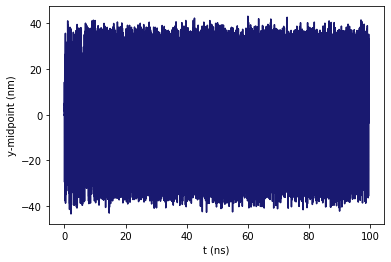

In [4]:
#load in single position time-series
_fname = 'testOut_047Y1.txt'
_fid = open(_fname)
_data = np.fromfile(_fid,dtype = 'float')
_fid.close()
N_time_steps = len(_data)
dt = 1.28
#loaded in and calculated data
y_of_t = _data
t = np.arange(N_time_steps)*dt

#plot time-series
plt.plot(t/1000.,y_of_t,color='midnightblue')
plt.ylabel('y-midpoint (nm)')
plt.xlabel('t (ns)')
plt.show()

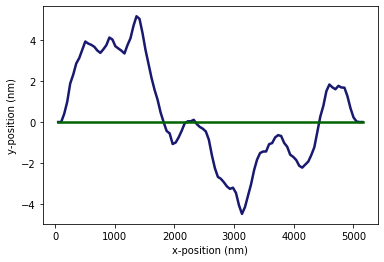

In [5]:
#load in and plot initial and final deflection.
_fname = 'testOut_047.txt'
_fid = open(_fname,'rb')
_fid.seek(int(8*(N_time_steps-1)*N_points*6),0)
_data = np.fromfile(_fid,count=int(N_points*6),dtype='float')
_fid.close()
x_final = _data[0::6]
y_final = _data[1::6]

plt.plot(x_final,y_final,lw=2.5,color='midnightblue')
plt.plot(x_init,y_init,lw=2.5,color='darkgreen')
plt.xlabel('x-position (nm)')
plt.ylabel('y-position (nm)')
plt.show()

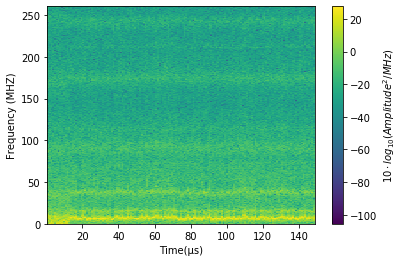

In [6]:
_fname='testOut_047Y1.txt'
_fid=open(_fname)
amplitude=np.fromfile(_fid,dtype='float')
_fid.close()

_NFFT=64*16

dt=1920
dt=dt/1e6

(spec,freq,t,_)=plt.specgram(amplitude,NFFT=_NFFT,Fs=1/dt,noverlap=_NFFT/2,cmap='viridis')
c=plt.colorbar()
c.set_label('$10\cdot log_{10}(Amplitude^2/MHz)$')
plt.xlabel('Time(\u03BCs)')
plt.ylabel('Frequency (MHZ)')
plt.show()

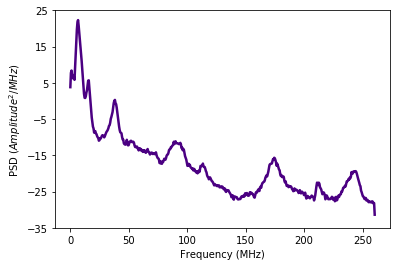

In [8]:
(PSD,frequency)=plt.psd(amplitude,NFFT=_NFFT,Fs=1/dt,noverlap=_NFFT/2,lw=2.5,color='indigo')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD $(Amplitude^2/MHz)$')
plt.grid(None)
plt.show()

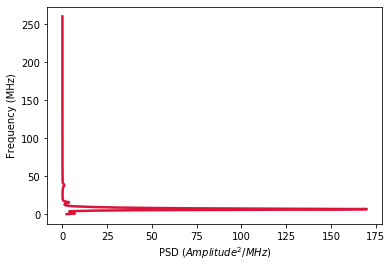

In [9]:
plt.plot(PSD,frequency,lw=2.5,color='crimson')
plt.xlabel('PSD $(Amplitude^2/MHz)$')
plt.ylabel('Frequency (MHz)')
plt.show()